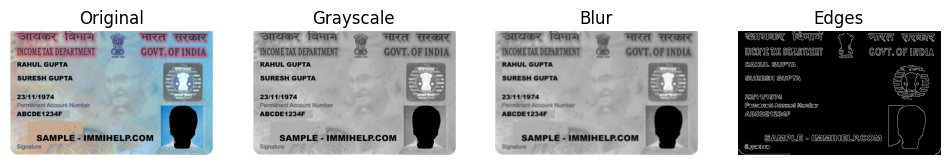

In [3]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("PanCard_Sample.jpg")   

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5, 5), 0)

edges = cv2.Canny(blur, 100, 200)



plt.figure(figsize=(12,6))

plt.subplot(1,4,1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(blur, cmap='gray')
plt.title("Blur")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(edges, cmap='gray')
plt.title("Edges")
plt.axis("off")

plt.show()

In [2]:
# Alternative solution using EasyOCR (no external dependencies needed)
# First install: pip install easyocr

try:
    import easyocr
    
    # Initialize the reader (this will download models on first run)
    reader = easyocr.Reader(['en'])
    
    image_path = "PanCard_Sample.jpg"
    
    # Read text from image
    result = reader.readtext(image_path)
    
    print("Extracted Text:")
    for detection in result:
        text = detection[1]
        print(text)
        
except ImportError:
    print("EasyOCR not installed. Installing...")
    print("Run: pip install easyocr")
except FileNotFoundError:
    print(f"Error: Image file '{image_path}' not found in the current directory")
    print(f"Current directory: {os.getcwd()}")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

C:\Users\JHAGAUT\AppData\Roaming\Python\Python313\site-packages\torch\utils\data\dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  super().__init__(loader)


Extracted Text:
314ar
fet
HR
rer
INCOME TAX DEPARTMENT
GOVT. OF INDIA
RAHUL GUPTA
SURESH GUPTA
23/11/1974
Permanent Account Number
ABCDE1234F
SAMPLE
IMMIHELPCOM
Signature


In [4]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")  
results = model("human.jpg", show=True)
for r in results:
    for box in r.boxes:
        print(
            "Class:", r.names[int(box.cls)],
            "Confidence:", float(box.conf),
            "x, y cordinates", box.xyxy   # x1,y1,x2,y2
        )

ModuleNotFoundError: No module named 'ultralytics'